<a href="https://colab.research.google.com/github/thomasshin/NLP_Study/blob/main/Pytorch_Practices/Pytorch_practice5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

#Non-linearity

Non-Linear Data

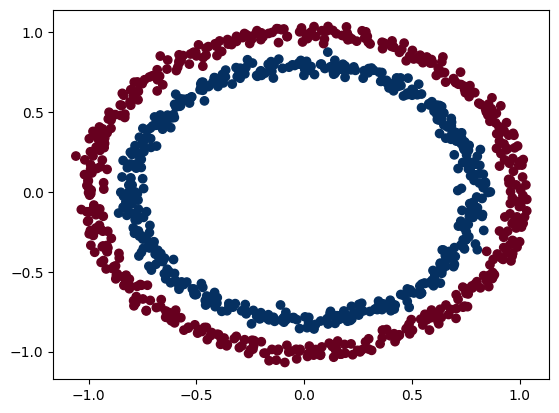

In [ ]:
X, y = make_circles(n_samples = 1000, noise = 0.03, random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [ ]:
#np to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#train test split,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train[:5], y_train[:5]

(tensor([[-0.4043, -0.8912],
         [-0.8764,  0.4842],
         [-0.4046,  0.8540],
         [-0.8381, -0.0271],
         [-0.7875, -0.2587]]),
 tensor([0., 0., 0., 1., 1.]))

In [ ]:
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

Building model with nonlinearity

non linear activation function : ReLU (Rectified Linear Unit)

torch.nn.ReLU

In [ ]:
from torch import nn
class NonLinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model1 = NonLinearModel().to(device)
model1

NonLinearModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [ ]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #number of correct
  acc = (correct / len(y_pred)) * 100
  return acc

Training a model with nonlinearity

In [ ]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(1, epochs+1):
  #train mode
  model1.train()
  train_logits = model1(X_train).squeeze()
  train_labels = torch.round(torch.sigmoid(train_logits))
  train_loss = loss_fn(train_logits, y_train)
  train_accuracy = accuracy_func(y_train, train_labels)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #test mode
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_labels = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_func(y_test, test_labels)

  if epoch % 100 == 0:
    print(f"epoch : {epoch} | train_loss : {train_loss} | train_accuracy : {train_accuracy} | test_loss : {test_loss} | test_accuracy : {test_accuracy}")


epoch : 100 | train_loss : 0.6871708035469055 | train_accuracy : 53.0 | test_loss : 0.6918547749519348 | test_accuracy : 47.0
epoch : 200 | train_loss : 0.6826104521751404 | train_accuracy : 53.75 | test_loss : 0.6877682209014893 | test_accuracy : 50.0
epoch : 300 | train_loss : 0.6758415102958679 | train_accuracy : 56.00000000000001 | test_loss : 0.6815952658653259 | test_accuracy : 50.5
epoch : 400 | train_loss : 0.6634588241577148 | train_accuracy : 59.0 | test_loss : 0.6693666577339172 | test_accuracy : 53.0
epoch : 500 | train_loss : 0.6425921320915222 | train_accuracy : 72.25 | test_loss : 0.6489019393920898 | test_accuracy : 70.0
epoch : 600 | train_loss : 0.6059554219245911 | train_accuracy : 84.75 | test_loss : 0.6130048036575317 | test_accuracy : 80.5
epoch : 700 | train_loss : 0.5399450659751892 | train_accuracy : 95.875 | test_loss : 0.5465056300163269 | test_accuracy : 95.0
epoch : 800 | train_loss : 0.4412689208984375 | train_accuracy : 97.0 | test_loss : 0.44676488637924

Evaluate model trained with non-linearity

In [ ]:
model1.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model1(X_test)))

y_preds[:5]

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

In [ ]:
class circlemodel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model2 = circlemodel2().to(device)
model2

circlemodel2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

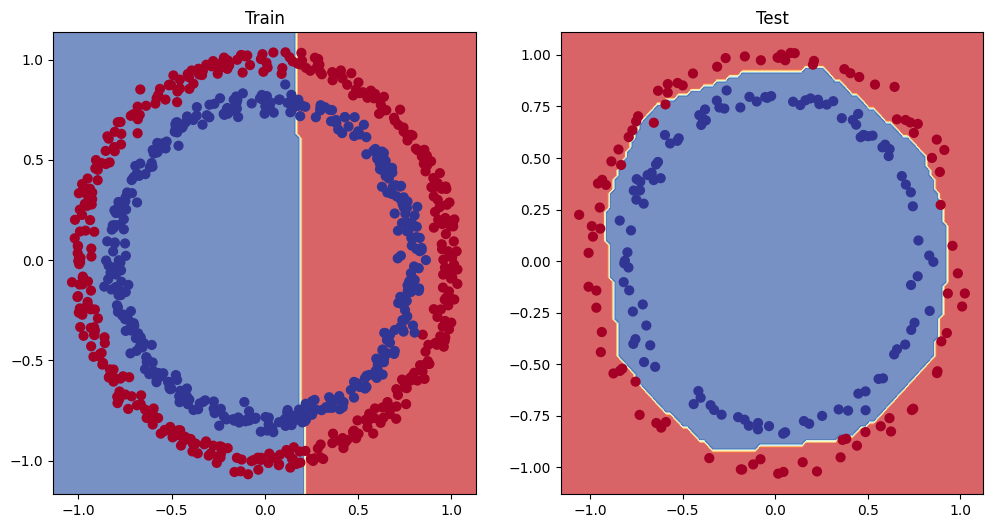

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test) # model_3 = has non-linearity

Replicating non-linear functions (sigmoid and relu)

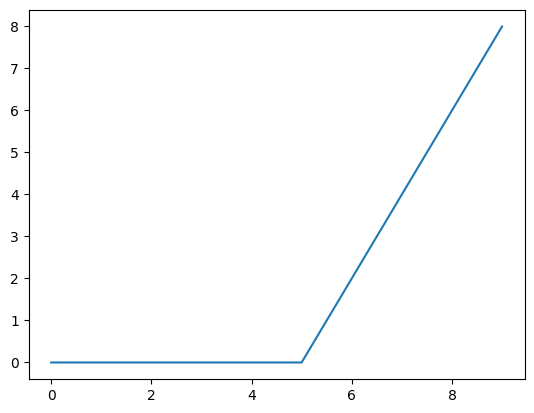

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) #input must be tensor

d =torch.arange(-10, 10, 2)
plt.plot(relu(d))

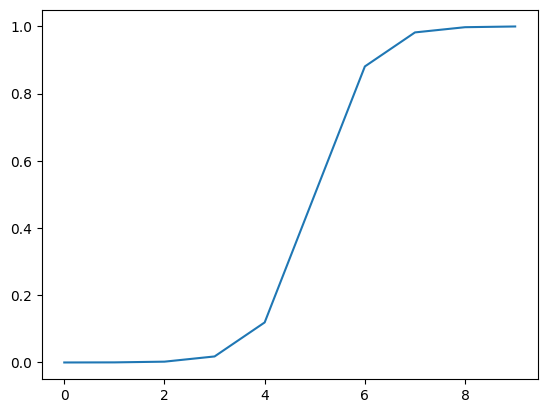

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(d))

#Multi-class model

create data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(
  n_samples = 10000,
  n_features = NUM_FEATURES,
  centers = NUM_CLASSES,
  cluster_std = 1.5,
  random_state = RANDOM_SEED
)

In [ ]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

print(X_blob[:3], y_blob[:3])

tensor([[ -3.1987,   7.3945],
        [ -9.0976, -10.2246],
        [  5.5605,   2.5364]]) tensor([0., 2., 1.])


In [ ]:
#train_test_split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

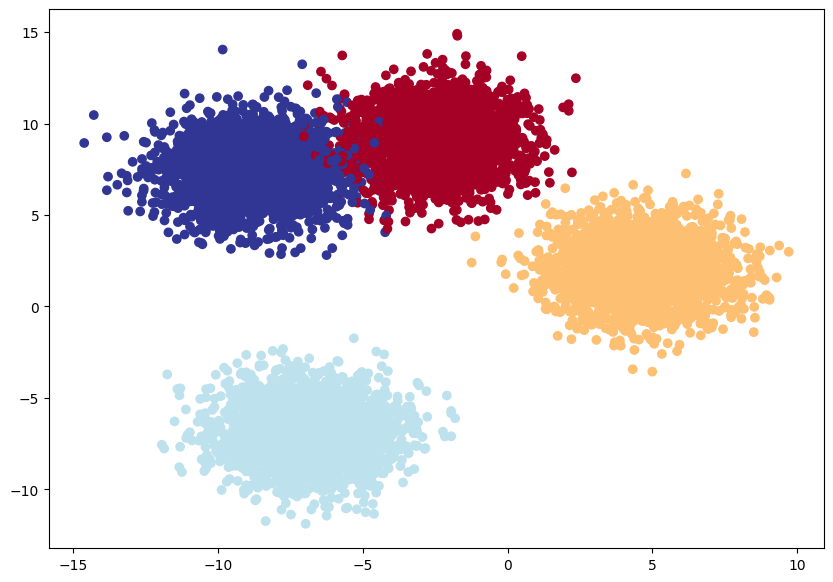

In [ ]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

building multi-class classification with PyTorch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

In [ ]:
class blobmodel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layer1 = nn.Linear(in_features=input_features, out_features=hidden_units)
    self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer3 = nn.Linear(in_features=hidden_units, out_features=4)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model1 = blobmodel(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(device)
model1

blobmodel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=4, bias=True)
)

In [ ]:
class blobmodel_relu(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layer1 = nn.Linear(in_features=input_features, out_features=hidden_units)
    self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer3 = nn.Linear(in_features=hidden_units, out_features=4)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model2 = blobmodel_relu(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(device)
model2

blobmodel_relu(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [ ]:
#prediction

model1.eval()
with torch.inference_mode():
  y_logits=model1(X_blob_train)
  y_prob = torch.softmax(y_logits, dim=1)
  y_label = torch.argmax(y_prob, dim=1)
y_label[:10]

tensor([1, 1, 1, 1, 3, 1, 1, 3, 1, 1], device='cuda:0')

Note: To summarize the above, a model's raw output is referred to as logits.

For a multi-class classification problem, to turn the logits into prediction probabilities, you use the softmax activation function (torch.softmax).

The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample (although this is a prediction, it doesn't mean it will be correct).

#model without non-linearity

In [ ]:
y_blob_train.unsqueeze(dim=1)

tensor([[0.],
        [0.],
        [3.],
        ...,
        [0.],
        [3.],
        [0.]], device='cuda:0')

In [ ]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(1, epochs+1):
  model1.train()
  train_logitss = model1(X_blob_train)
  train_labelss = torch.argmax(torch.softmax(train_logitss, dim=1), dim=1)
  train_losses = loss_fn(train_logitss, y_blob_train.type(torch.LongTensor).to(device))
  train_accu = accuracy_func(y_blob_train, train_labelss)
  optimizer.zero_grad()
  train_losses.backward()
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_logitss = model1(X_blob_test)
    test_labelss = torch.argmax(torch.softmax(test_logitss, dim=1), dim=1)
    test_losses = loss_fn(test_logitss, y_blob_test.type(torch.LongTensor).to(device))
    test_accu = accuracy_func(y_blob_test, test_labelss)

  if epoch % 100 == 0:
    print(f"epoch : {epoch} | train_loss : {train_losses} | train_accuracy : {train_accu} | test_loss : {test_losses} | test_accuracy : {test_accu}")

epoch : 100 | train_loss : 0.03496105596423149 | train_accuracy : 98.95 | test_loss : 0.042407698929309845 | test_accuracy : 98.55000000000001
epoch : 200 | train_loss : 0.0297869760543108 | train_accuracy : 98.96249999999999 | test_loss : 0.03834638372063637 | test_accuracy : 98.6
epoch : 300 | train_loss : 0.028332214802503586 | train_accuracy : 98.96249999999999 | test_loss : 0.03738789260387421 | test_accuracy : 98.6
epoch : 400 | train_loss : 0.02759280428290367 | train_accuracy : 98.9875 | test_loss : 0.03690426051616669 | test_accuracy : 98.6
epoch : 500 | train_loss : 0.0270924661308527 | train_accuracy : 99.05000000000001 | test_loss : 0.0365392342209816 | test_accuracy : 98.7
epoch : 600 | train_loss : 0.02669926919043064 | train_accuracy : 99.0625 | test_loss : 0.036213576793670654 | test_accuracy : 98.7
epoch : 700 | train_loss : 0.02636401169002056 | train_accuracy : 99.075 | test_loss : 0.035904351621866226 | test_accuracy : 98.65
epoch : 800 | train_loss : 0.026064328849

In [ ]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(1, epochs+1):
  model2.train()
  train_logitss = model2(X_blob_train)
  train_labelss = torch.argmax(torch.softmax(train_logitss, dim=1), dim=1)
  train_losses = loss_fn(train_logitss, y_blob_train.type(torch.LongTensor).to(device))
  train_accu = accuracy_func(y_blob_train, train_labelss)
  optimizer.zero_grad()
  train_losses.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logitss = model2(X_blob_test)
    test_labelss = torch.argmax(torch.softmax(test_logitss, dim=1), dim=1)
    test_losses = loss_fn(test_logitss, y_blob_test.type(torch.LongTensor).to(device))
    test_accu = accuracy_func(y_blob_test, test_labelss)

  if epoch % 100 == 0:
    print(f"epoch : {epoch} | train_loss : {train_losses} | train_accuracy : {train_accu} | test_loss : {test_losses} | test_accuracy : {test_accu}")

epoch : 100 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 200 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 300 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 400 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 500 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 600 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 700 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_accuracy : 39.2
epoch : 800 | train_loss : 1.1614432334899902 | train_accuracy : 38.05 | test_loss : 1.1577328443527222 | test_

In [ ]:
#model1 prediction
model1.eval()
with torch.inference_mode():
  y_logits = model1(X_blob_test)
y_logits[:10]

tensor([[  5.8084,  28.4261, -24.6033, -19.4739],
        [  1.5988,  19.4120, -14.5087, -13.9461],
        [  5.0767,  17.8497, -16.8028, -11.8522],
        [ -7.1581, -27.8054,  25.5923,  18.5982],
        [ 10.6003, -27.8776,   8.5739,  23.4453],
        [  5.5371,  26.2314, -22.8698, -17.9246],
        [ 10.7603, -14.9349,  -0.2650,  13.9199],
        [  3.4162,  14.5648, -13.0027,  -9.8720],
        [  4.4501,  24.6145, -20.7402, -17.0227],
        [  4.4999,  22.8475, -19.6022, -15.7028]], device='cuda:0')

In [ ]:
y_labels = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
accuracy_func(y_blob_test, y_labels)

98.7

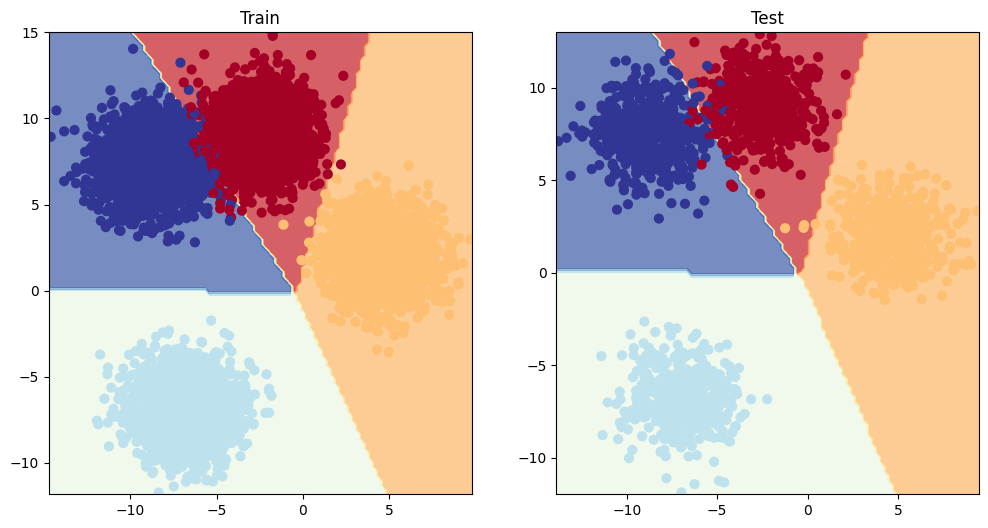

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1, X_blob_test, y_blob_test)

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_labels, y_blob_test.type(torch.int))

tensor(0.9870, device='cuda:0')